In [1]:
# read the input files and look at the top few lines #
sql = SQLContext(sc)
data_matches = (sql.read.format("com.databricks.spark.csv").option("header", "true").load("/home/rajan/ipl/IPL-PySpy/input/csv/matches.csv"))
data_matches.show() # display the top 20 rows of the file matches.csv

+---+------+----------+----------+--------------------+--------------------+--------------------+-------------+------+----------+--------------------+-----------+--------------+---------------+--------------------+-----------+--------------+-------+
| id|season|      city|      date|               team1|               team2|         toss_winner|toss_decision|result|dl_applied|              winner|win_by_runs|win_by_wickets|player_of_match|               venue|    umpire1|       umpire2|umpire3|
+---+------+----------+----------+--------------------+--------------------+--------------------+-------------+------+----------+--------------------+-----------+--------------+---------------+--------------------+-----------+--------------+-------+
|  1|  2008| Bangalore|2008-04-18|Kolkata Knight Ri...|Royal Challengers...|Royal Challengers...|        field|normal|         0|Kolkata Knight Ri...|        140|             0|    BB McCullum|M Chinnaswamy Sta...|  Asad Rauf|   RE Koertzen|   null|


**We will now find the team versus team percentage of 'Rajasthan Royals' and 'Mumbai Indians'
for that we will select three columns team1, team2, and winner.**

In [2]:
team_winner = data_matches.select(data_matches.team1,data_matches.team2,data_matches.winner)
team_winner.show()

+--------------------+--------------------+--------------------+
|               team1|               team2|              winner|
+--------------------+--------------------+--------------------+
|Kolkata Knight Ri...|Royal Challengers...|Kolkata Knight Ri...|
| Chennai Super Kings|     Kings XI Punjab| Chennai Super Kings|
|    Rajasthan Royals|    Delhi Daredevils|    Delhi Daredevils|
|      Mumbai Indians|Royal Challengers...|Royal Challengers...|
|     Deccan Chargers|Kolkata Knight Ri...|Kolkata Knight Ri...|
|     Kings XI Punjab|    Rajasthan Royals|    Rajasthan Royals|
|     Deccan Chargers|    Delhi Daredevils|    Delhi Daredevils|
| Chennai Super Kings|      Mumbai Indians| Chennai Super Kings|
|     Deccan Chargers|    Rajasthan Royals|    Rajasthan Royals|
|     Kings XI Punjab|      Mumbai Indians|     Kings XI Punjab|
|Royal Challengers...|    Rajasthan Royals|    Rajasthan Royals|
|Kolkata Knight Ri...| Chennai Super Kings| Chennai Super Kings|
|      Mumbai Indians|   

**Team vs Team Win Percentage**

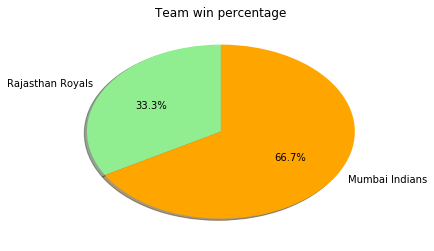

In [3]:
import matplotlib.pyplot as plt #visualization library
ft = 'Rajasthan Royals'
st = 'Mumbai Indians'
#filter the two teams
team1_= team_winner.filter(team_winner.team1 == ft)
team2_= team1_.filter(team1_.team2 == st)
winners_ = team2_.filter(team2_.winner == ft)
winners2_ = team2_.filter(team2_.winner == st)
#calculate the percentage 
a = winners_.count()
b = winners2_.count()
c = team2_.count()
if a+b != c:
    c = c - (c-(a+b))
d = (a*100)/float(c)
e = (b*100)/float(c)
#plot the pie chart
labels = (ft,st)
sizes = ((a*100)/float(c),(b*100)/float(c))
colors = ['lightgreen', 'orange']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Team win percentage")
plt.show()